# IMPORTING LIBRARIES

In [1]:
# data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.colors

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/metabolic-syndrome/Metabolic Syndrome.csv


/tmp/ipykernel_21/2671675894.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# DATA EXPLORATION 

In [2]:
df = pd.read_csv('../input/metabolic-syndrome/Metabolic Syndrome.csv')

In [3]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [4]:
df.tail()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1
2400,71915,60,Male,Single,6200.0,White,106.6,27.5,0,12.82,5.2,91,36,226,1


In [5]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [7]:
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object

In [8]:
df.shape

(2401, 15)

In [9]:
df.columns

Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

# CHECKING AND DEALING WITH NULL VALUES

In [10]:
df.isna

<bound method DataFrame.isna of        seqn  Age     Sex  Marital  Income         Race  WaistCirc   BMI  \
0     62161   22    Male   Single  8200.0        White       81.0  23.3   
1     62164   44  Female  Married  4500.0        White       80.1  23.2   
2     62169   21    Male   Single   800.0        Asian       69.6  20.1   
3     62172   43  Female   Single  2000.0        Black      120.4  33.3   
4     62177   51    Male  Married     NaN        Asian       81.1  20.1   
...     ...  ...     ...      ...     ...          ...        ...   ...   
2396  71901   48  Female  Married  1000.0        Other        NaN  59.7   
2397  71904   30  Female   Single  2000.0        Asian        NaN  18.0   
2398  71909   28    Male   Single   800.0  MexAmerican      100.8  29.4   
2399  71911   27    Male  Married  8200.0  MexAmerican      106.6  31.3   
2400  71915   60    Male   Single  6200.0        White      106.6  27.5   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglyceri

In [11]:
df.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

<Axes: >

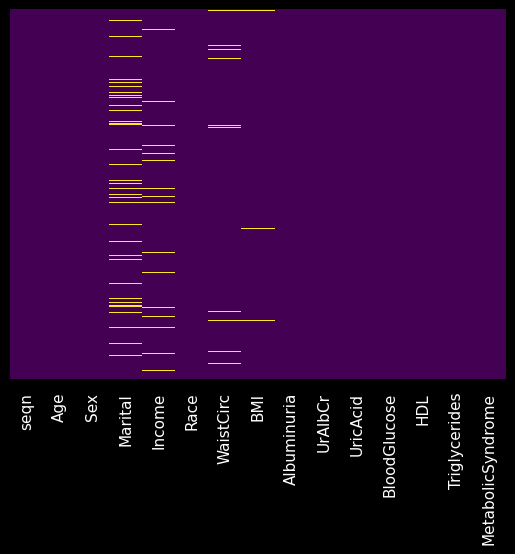

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

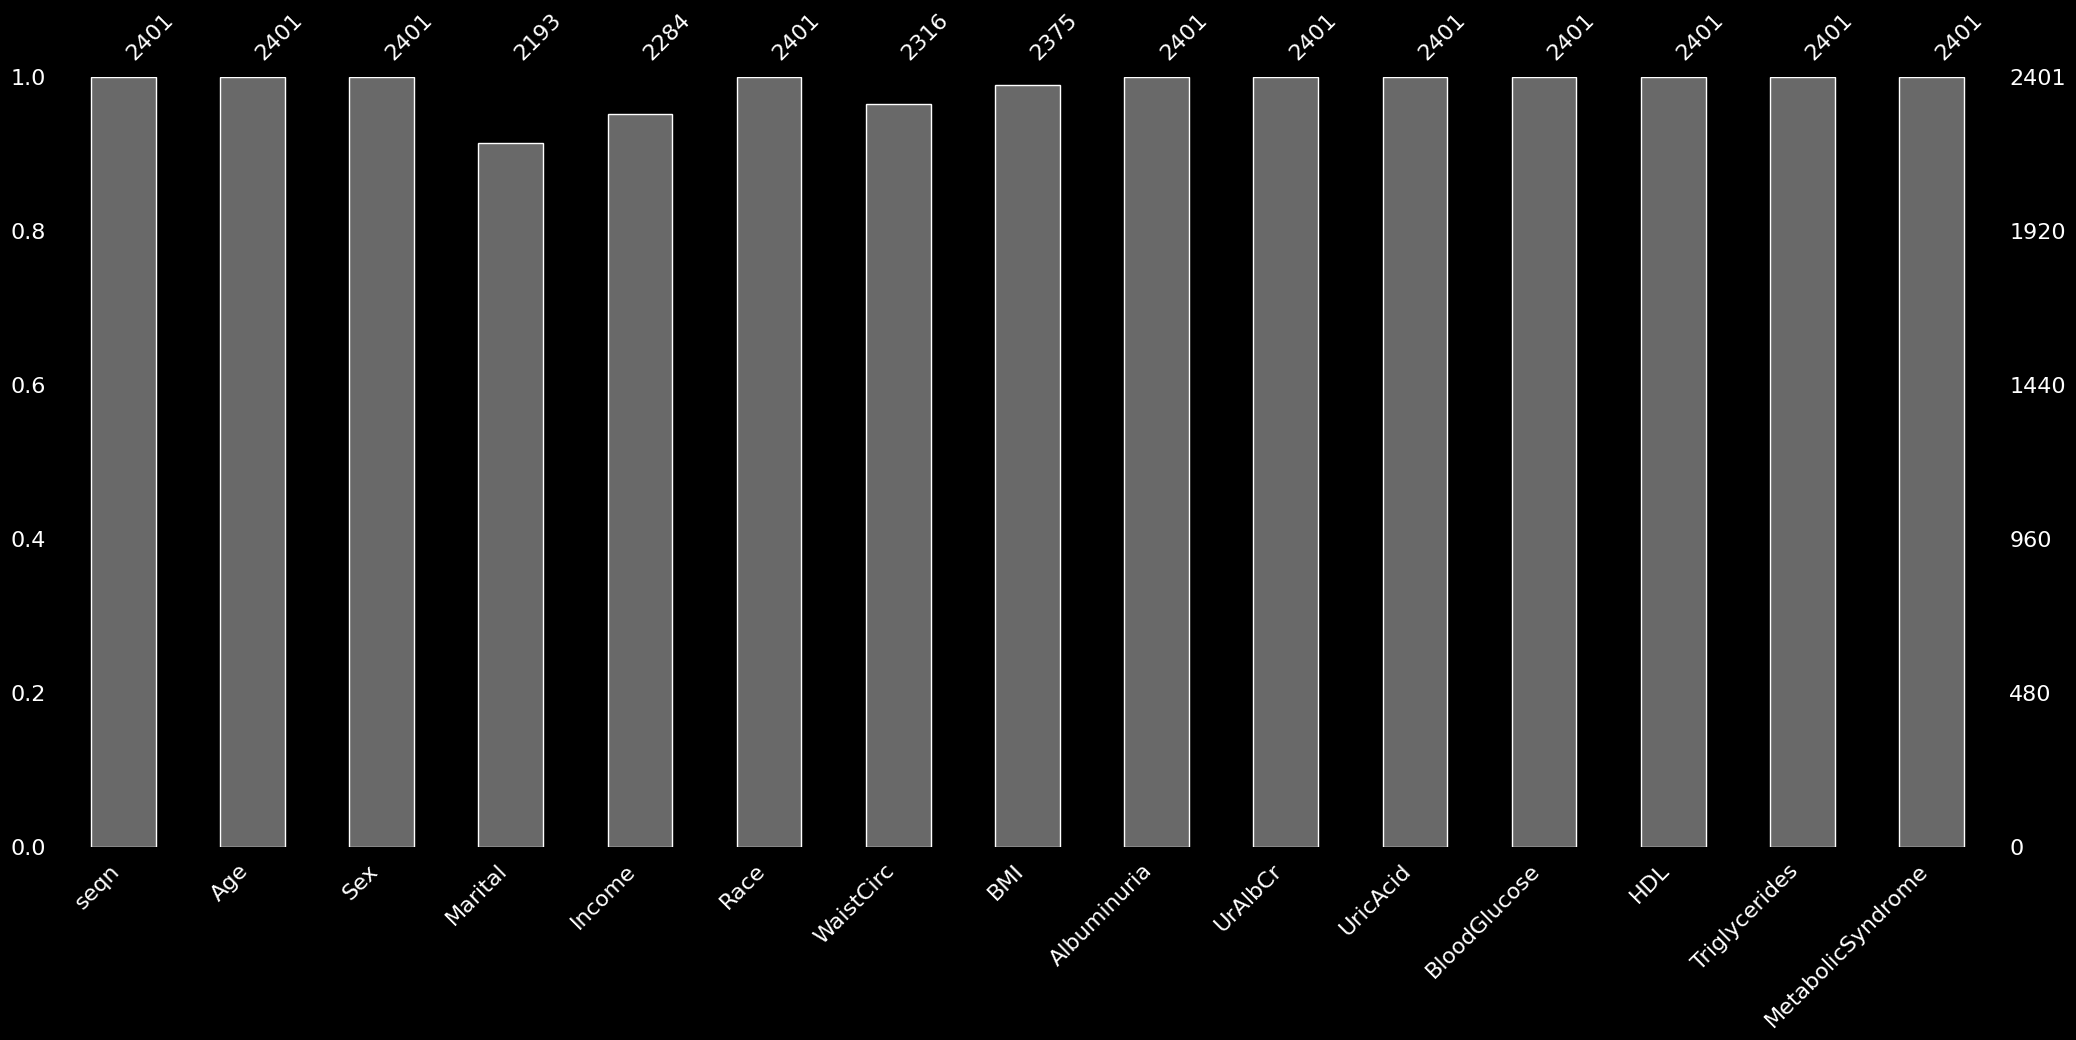

In [13]:
ms.bar(df)

<Axes: >

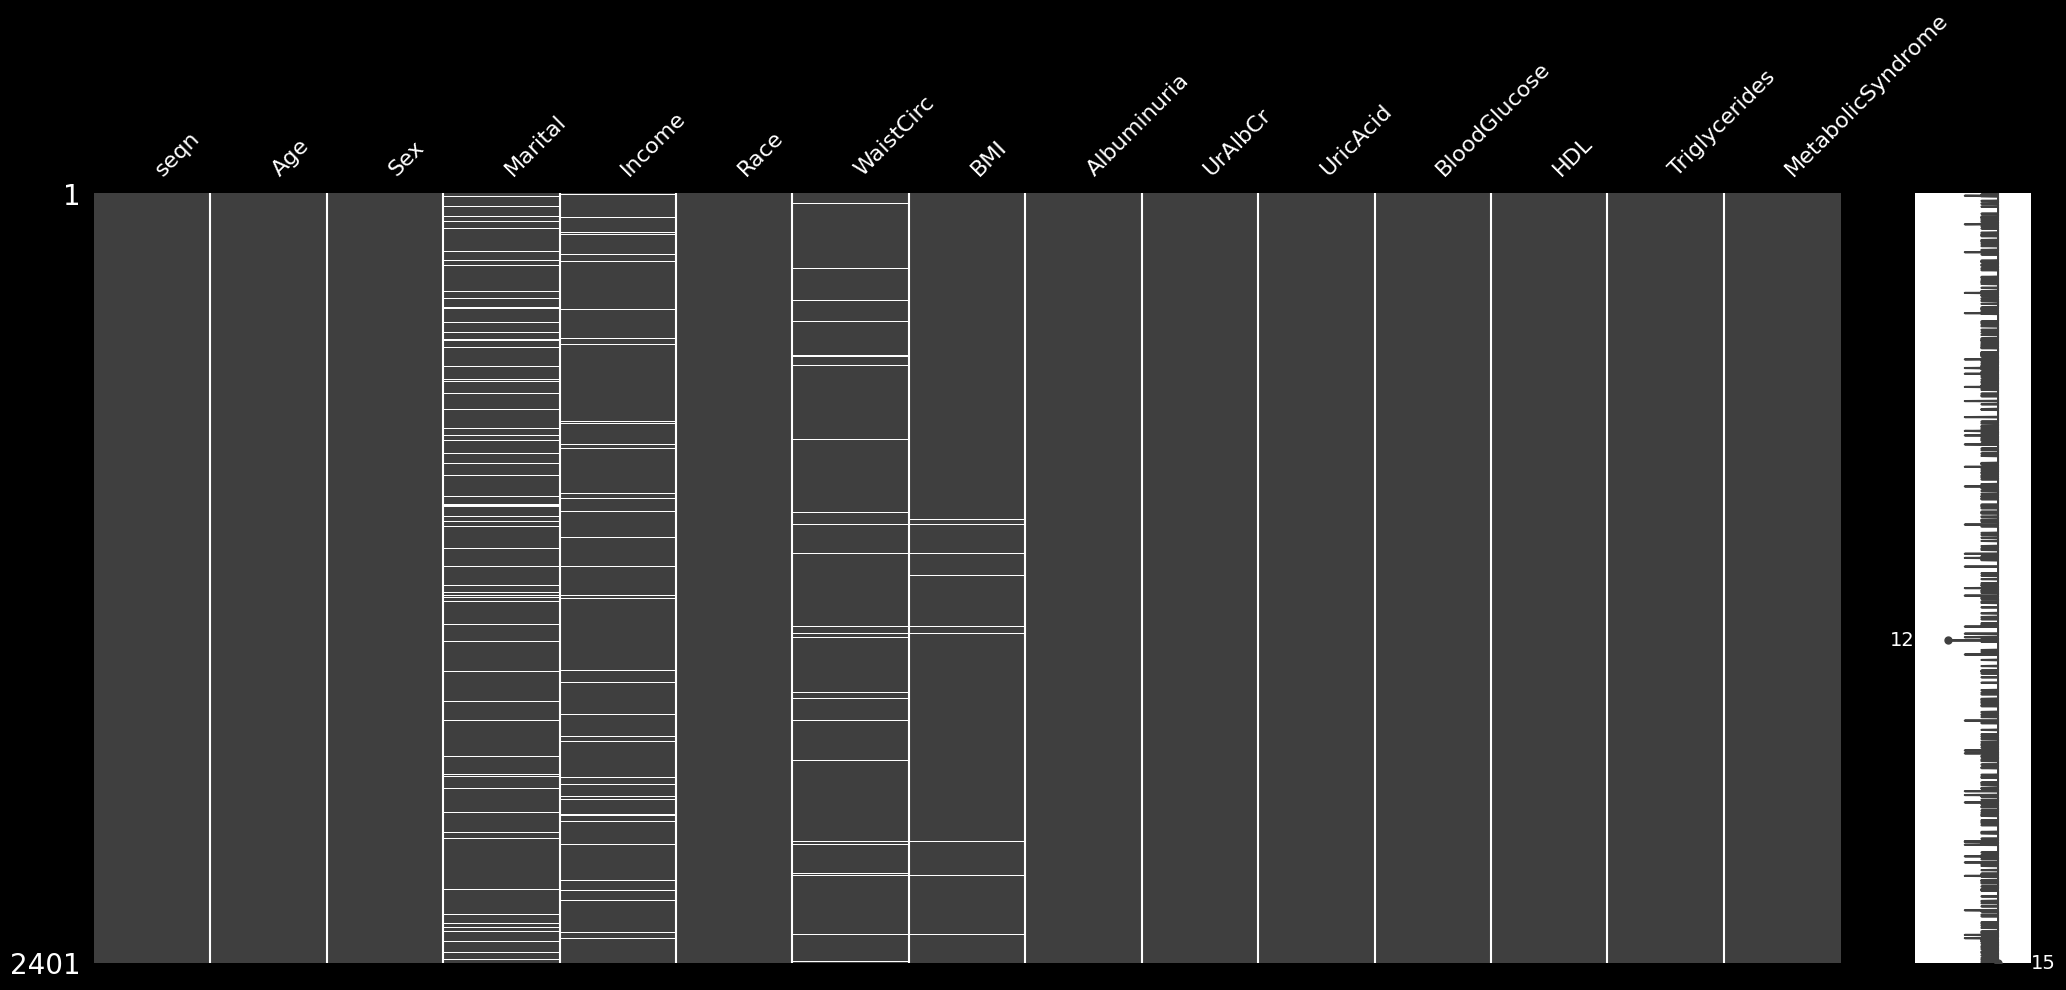

In [14]:
ms.matrix(df)

Text(0.5, 1.0, 'Distribution of Missing Values')

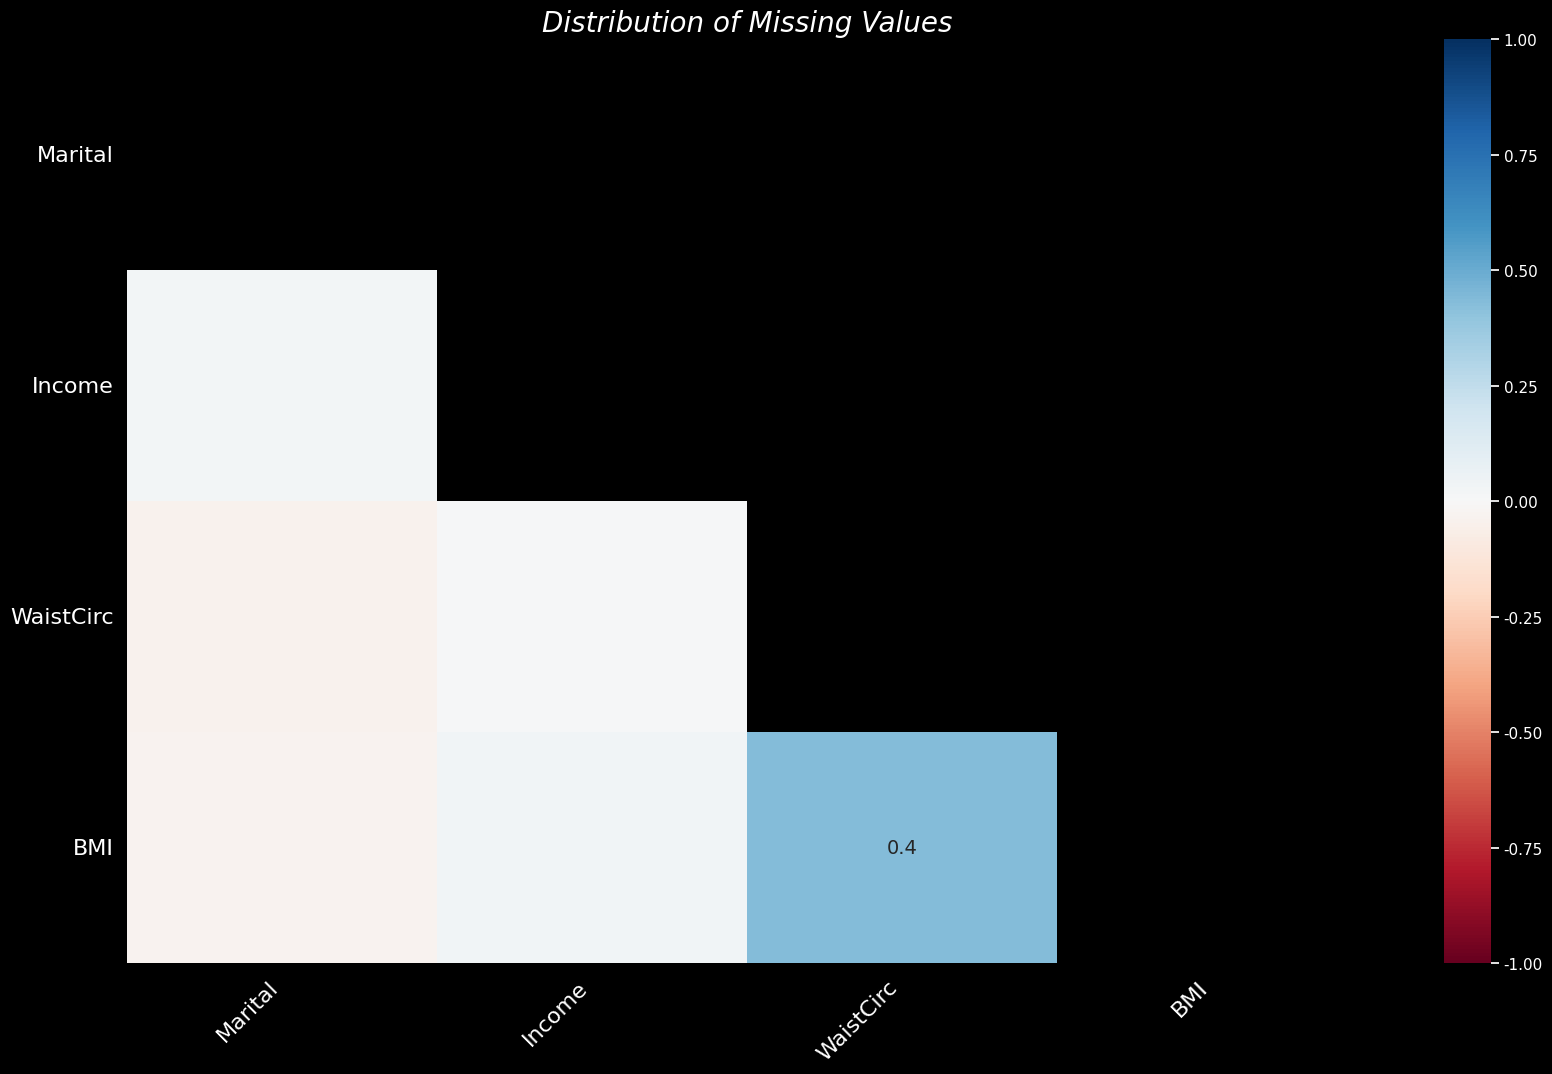

In [15]:
ms.heatmap(df)
plt.title('Distribution of Missing Values',fontsize=20, fontstyle= 'oblique')

In [16]:
dfn=df.dropna(axis=0)
dfn

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,71895,31,Male,Married,2500.0,Asian,74.0,20.6,0,2.00,6.7,95,64,81,0
2395,71898,65,Female,Married,5400.0,MexAmerican,98.5,29.4,0,5.51,6.7,114,49,165,1
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


<Axes: >

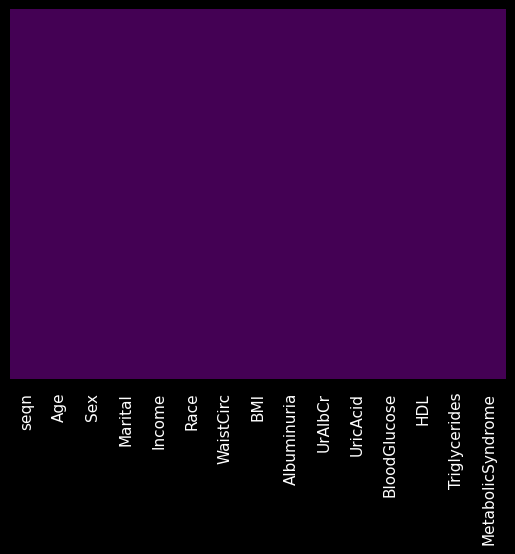

In [17]:
sns.heatmap(dfn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**NO MORE MISSING VALUES**

# EXPLORATORY DATA ANALYSIS

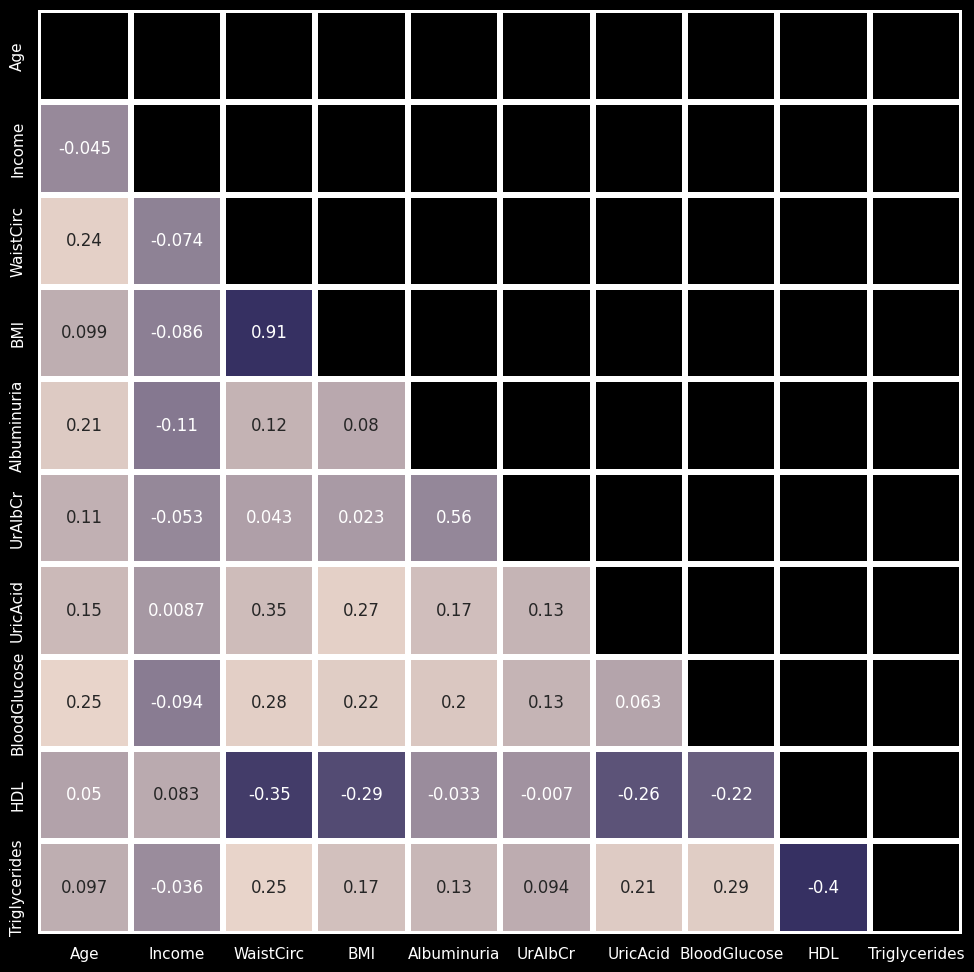

In [18]:
e = dfn[['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']]


plt.subplots(figsize = (12, 12))
cmap = mpl.colors.LinearSegmentedColormap.from_list("",
                                                           ['#363062',
                                                            '#E9D5CA',
                                                            '#363062',
                                                           ])

mask = np.triu(np.ones_like(e.corr() ))
sns.heatmap(e.corr(),
            mask = mask,
            cmap = cmap,
            cbar = False,
            square = True,
            annot = True,
            linewidths = 3,
           );

In [19]:
sns.set_theme(style = 'dark')
pal = sns.color_palette("husl", 9)

In [20]:
numerical_features = dfn._get_numeric_data().columns

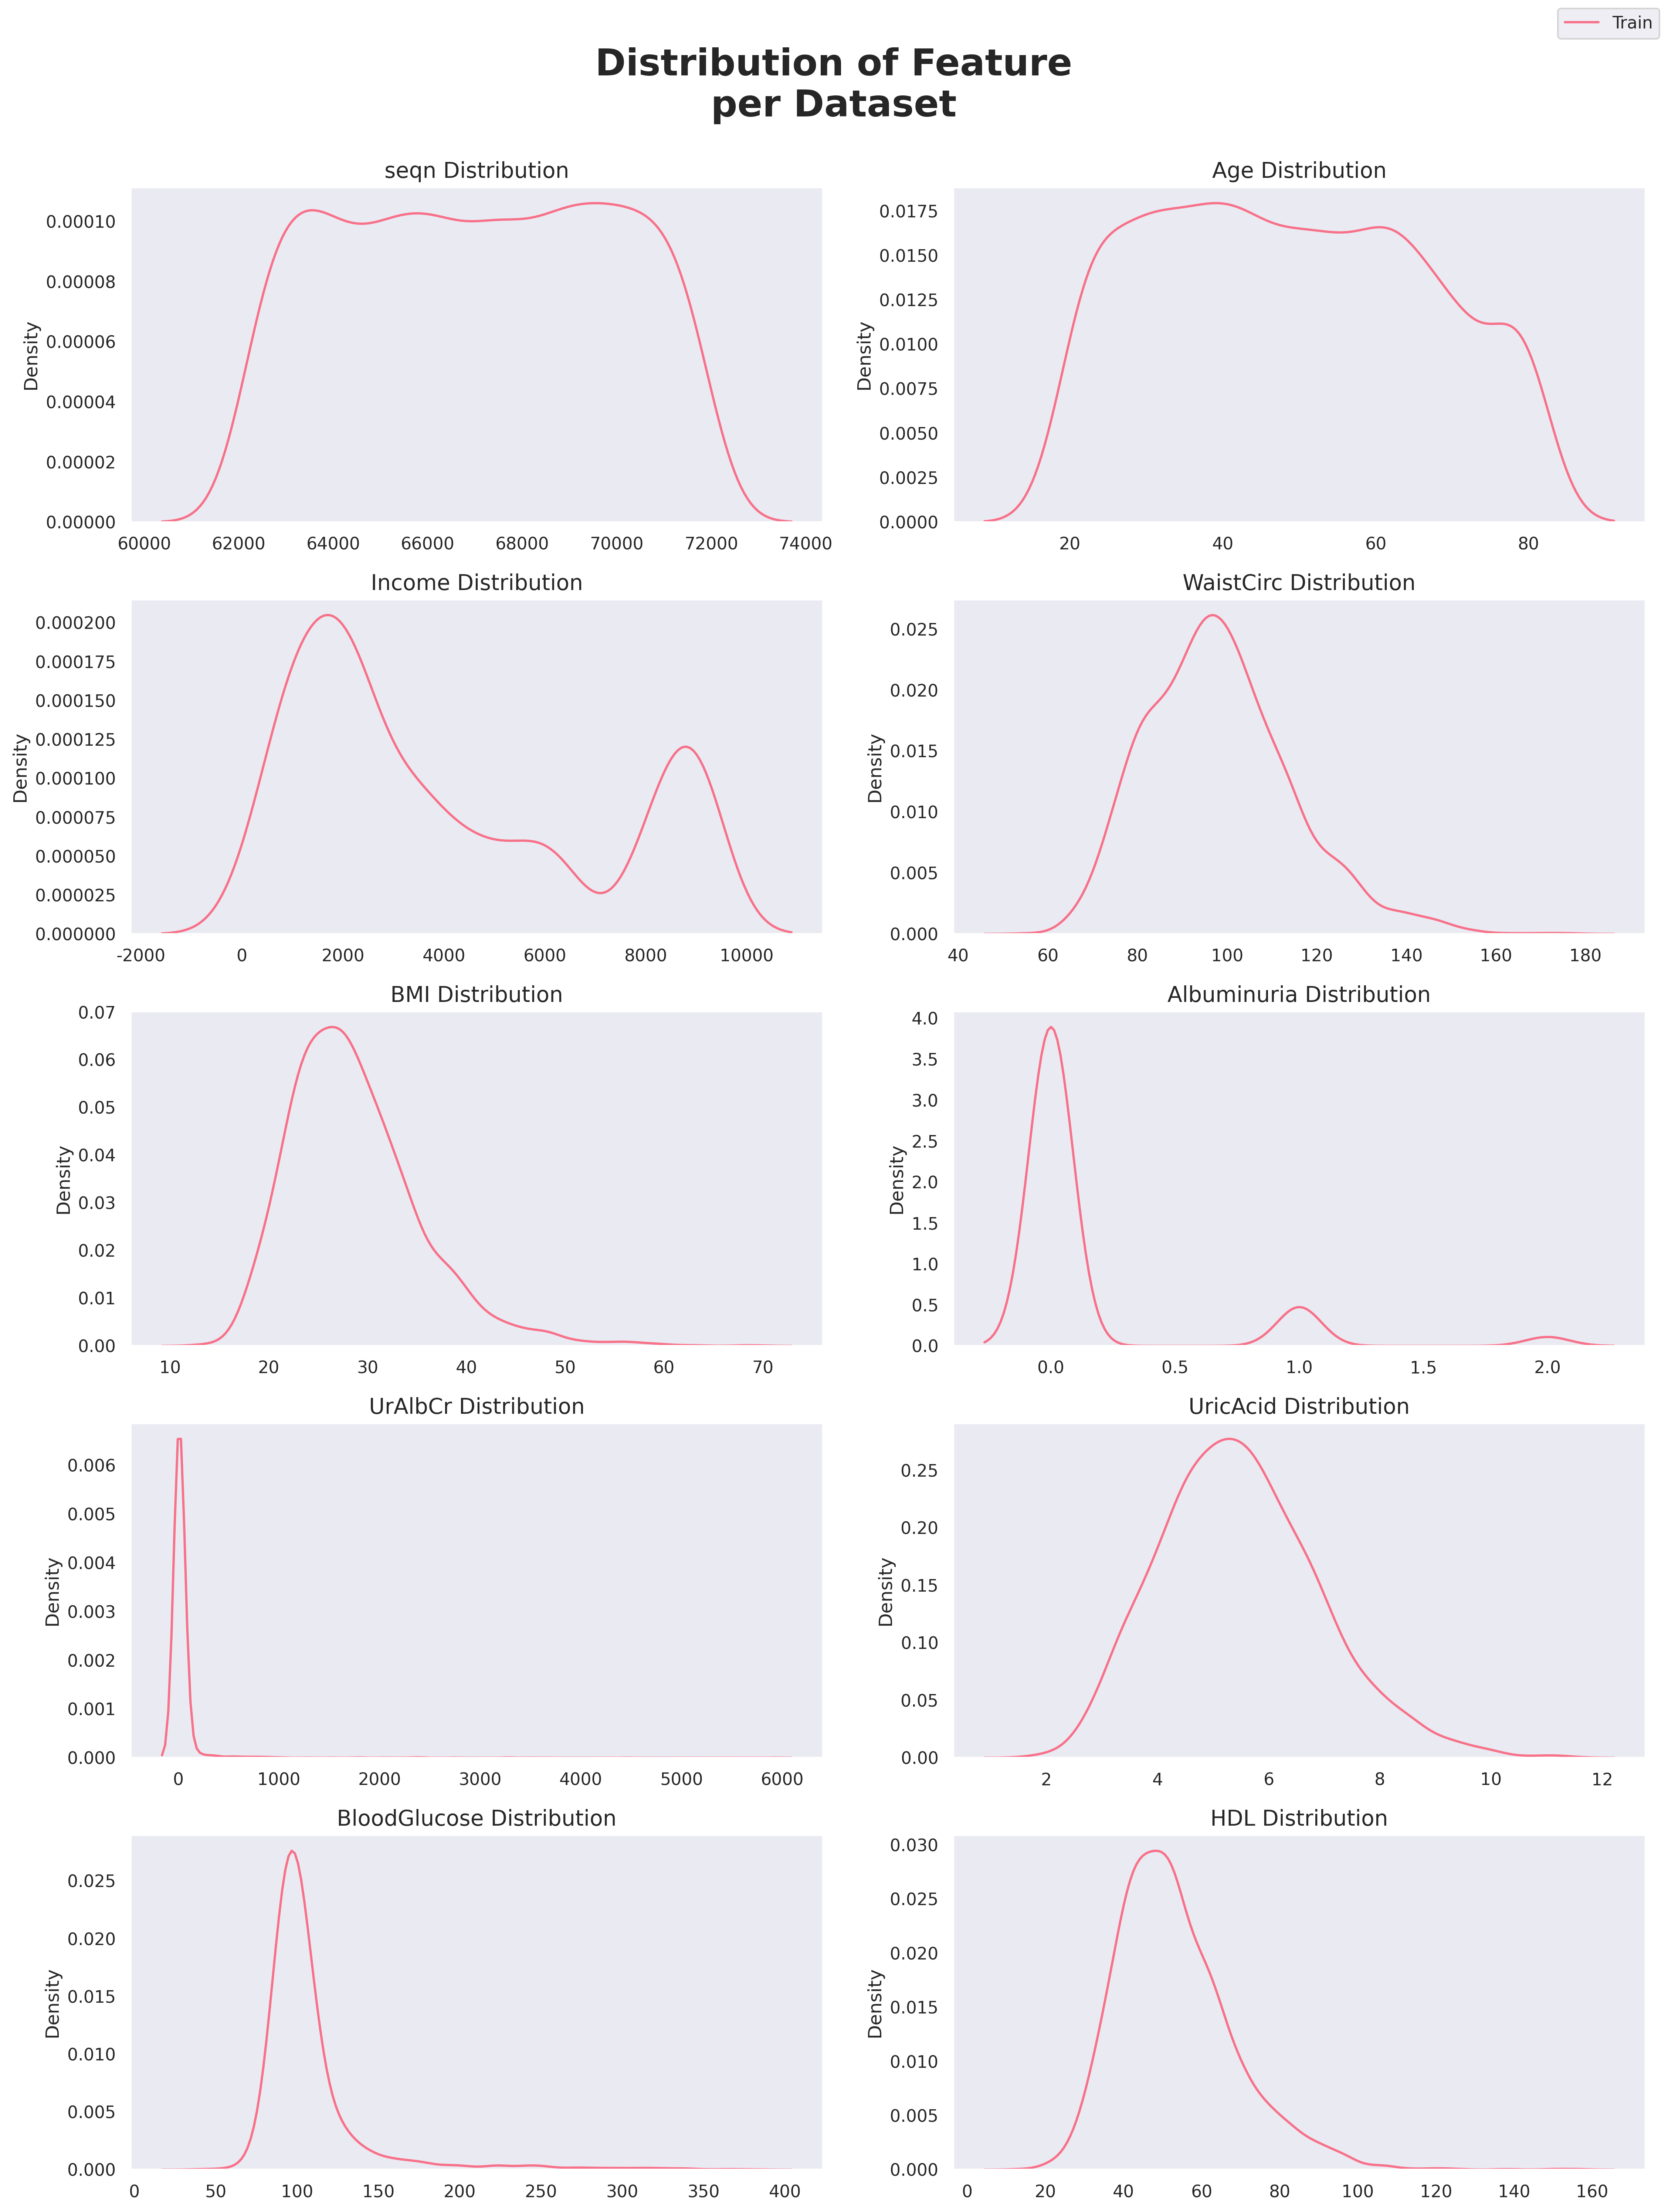

In [21]:
#By Iqbal Syah Akbar https://www.kaggle.com/code/iqbalsyahakbar/ps3e22-multi-class-classification-for-beginners 

fig, ax = plt.subplots(5, 2, figsize = (15, 20), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(numerical_features):
    
    if i == 10:
        break
    
    sns.kdeplot(df[column], ax=ax[i], color=pal[0])
    #sns.kdeplot(test[column], ax=ax[i], color=pal[2], warn_singular = False)
    #sns.kdeplot(orig_train[column], ax=ax[i], color=pal[1])
    
    ax[i].set_title(f'{column} Distribution', size = 14)
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train'])
plt.tight_layout()


In [22]:
categorical_features = dfn[['Race', 'Marital']]

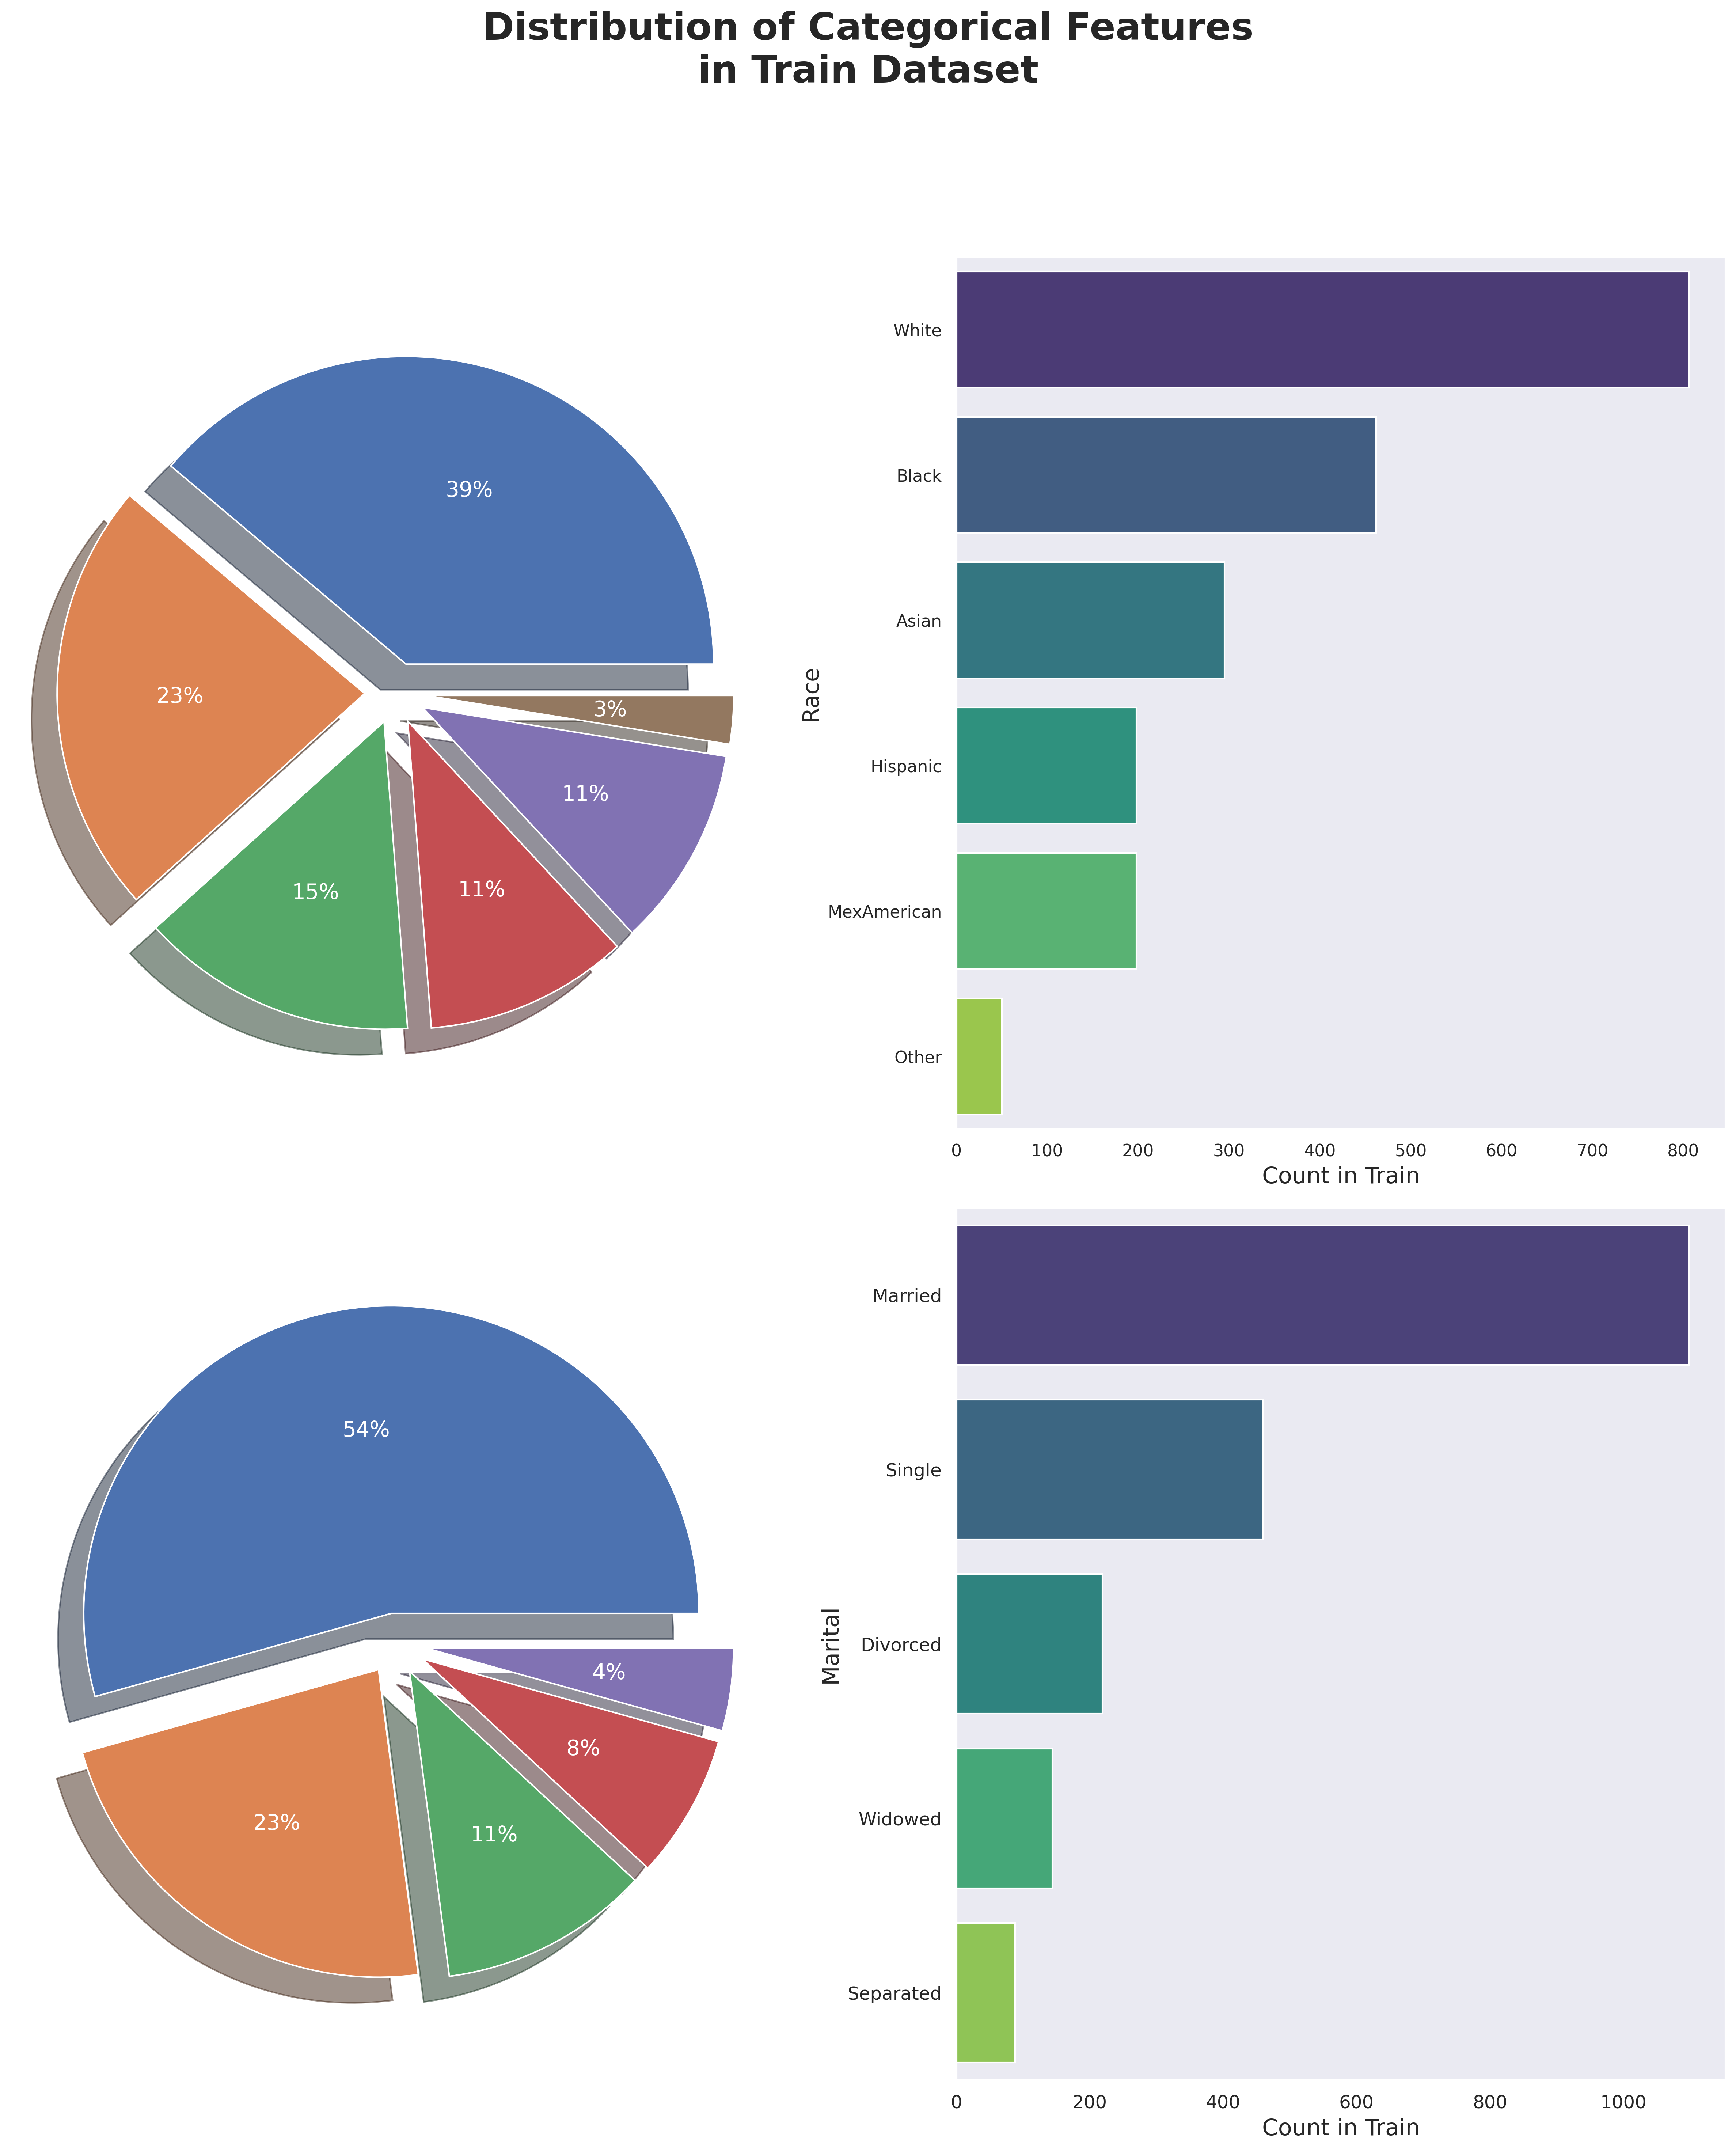

In [23]:
#By Iqbal Syah Akbar https://www.kaggle.com/code/iqbalsyahakbar/ps3e22-multi-class-classification-for-beginners
fig, ax = plt.subplots(2, 2, figsize = (16, 20), dpi = 300)

for i, column in enumerate(categorical_features):

    ax[i][0].pie(
        df[column].value_counts(), 
        shadow = True, 
        explode = [.1 for i in range(df[column].nunique())], 
        autopct = '%1.f%%',
        textprops = {'size' : 14, 'color' : 'white'}
    )

    sns.countplot(data = dfn, y = column, ax = ax[i][1], palette = 'viridis', order = df[column].value_counts().index)
    ax[i][1].yaxis.label.set_size(20)
    plt.yticks(fontsize = 12)
    ax[i][1].set_xlabel('Count in Train', fontsize = 15)
    ax[i][1].set_ylabel(f'{column}', fontsize = 15)
    plt.xticks(fontsize = 12)

fig.suptitle('Distribution of Categorical Features\nin Train Dataset\n\n\n\n', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

Notebook Color Schema:


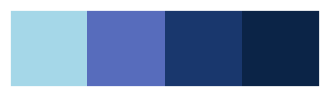

In [24]:
#By Gabriel Preda

from matplotlib.colors import ListedColormap 
def set_color_map(color_list):
    cmap_custom = ListedColormap(color_list) 
    print("Notebook Color Schema:")   
    sns.palplot(sns.color_palette(color_list)) 
    plt.show() 
    return cmap_custom 
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"] 
cmap_custom = set_color_map(color_list)

In [25]:
#By Gabriel Preda
def plot_count_pairs(dfn, feature, title, hue="Marital"): 
    f, ax = plt.subplots(1, 1, figsize=(8, 4)) 
    sns.countplot(x=feature, data=dfn, hue=hue, palette= color_list) 
    plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major") 
    ax.set_title(f"Penis Measurement  / {title}") 
    plt.show() 

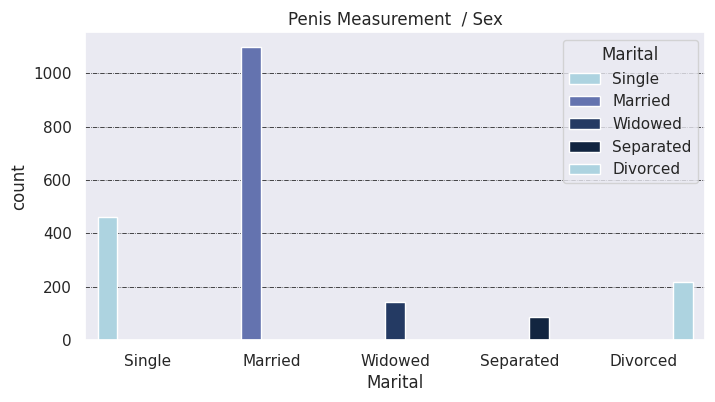

In [26]:
plot_count_pairs(dfn, "Marital", "Sex")

In [27]:
fig = px.bar(dfn, 
             x='Race', y='Income',color_discrete_sequence=['purple'],
             title='Incomes By Race')
fig.show()

In [28]:
fig = px.bar(dfn, 
             x='Sex', y='Income',color_discrete_sequence=['purple'],
             title='Incomes By Sex')
fig.show()

In [29]:
fig = px.bar(dfn, 
             x='Marital', y='Income',color_discrete_sequence=['purple'],
             title='Incomes By Marital Satatus')
fig.show()

In [30]:
fig = px.bar(dfn, 
             x='Race', y='WaistCirc',color_discrete_sequence=['purple'],
             title='Waist Circumference By Race')
fig.show()

In [31]:
fig = px.bar(dfn, 
             x='Sex', y='WaistCirc',color_discrete_sequence=['purple'],
             title='Waist Circumference By Sex')
fig.show()

In [32]:
fig = px.bar(dfn, 
             x='Marital', y='WaistCirc',color_discrete_sequence=['purple'],
             title='Waist Circumference By Marital Status')
fig.show()

In [33]:
fig = px.bar(dfn, 
             x='Race', y='BMI',color_discrete_sequence=['purple'],
             title='BMI By Race')
fig.show()

In [34]:
fig = px.bar(dfn, 
             x='Sex', y='BMI',color_discrete_sequence=['purple'],
             title='BMI By Sex')
fig.show()

In [35]:
fig = px.bar(dfn, 
             x='Marital', y='BMI',color_discrete_sequence=['purple'],
             title='BMI By Marital Status')
fig.show()